# Correlation plots of uncleaned and FIX-cleaned data
Non-neuronal fluctuations can induce strong correlations from visual cortex to superior cerebellum. This notebook shows seed-based correlation maps of a voxel in the superior cerebellum of the uncleaned data and the data cleaned using FIX. It also shows correlation maps with seeds in the inferior occipital cortex.

In [23]:
import nibabel as nib
from pathlib import Path
import os.path as op
import preprocessing.paths as paths
import Functional_Fusion.util as util
from scripts import seed_correlation as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Functional_Fusion.plot import ortho
from scipy.linalg import inv


## Get paths and data

In [4]:
# set paths
base_dir = paths.set_base_dir()
rest_dir = f'{base_dir}/../Cerebellum/super_cerebellum/resting_state/'
results_dir = f'{base_dir}/../Cerebellum/super_cerebellum/resting_state/fix_ica/corrmaps'
figure_dir = paths.set_figure_dir()

participants = pd.read_csv(f'{base_dir}/MDTB/participants.tsv', sep='\t')
participants['ses-rest'] = ~np.logical_not(participants['ses-rest'].astype(int))
subjects_rest = participants.participant_id[participants['ses-rest']].tolist()

In [103]:
# Load all correlation maps and example funcs as background
corrmaps = []
exfuncs = []
highres = []
for subject in subjects_rest[:6]:
    subject = f"s{subject.split('-')[1]}"
    print(f'Loading {subject}')
    for r, run in enumerate(['01', '02']):
        # Load correlation map
        corrmap = nib.load(f'{results_dir}/c_{subject}-run{run}_prefix.nii.gz')
        corrmaps.append(corrmap)
        # Load example func
        exfunc = nib.load(f'{rest_dir}/imaging_data/{subject}/run{run}.feat/reg/example_func.nii.gz')
        exfuncs.append(exfunc)
        # Load highres
        highres.append(nib.load(f'{rest_dir}/imaging_data/{subject}/run{run}.feat/reg/highres.nii.gz'))
        

Loading s02
Loading s03
Loading s06
Loading s08
Loading s10
Loading s12


# Plot results

## Plot correlation maps

In [111]:
# Plot settings
background = 'black'
red_yellow = plt.cm.get_cmap('Reds_r', 256)



/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_91449/2582427816.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  red_yellow = plt.cm.get_cmap('Reds_r', 256)


(37, 21, 18)
[  7.96744901 -49.60028934 -33.21341515]


<Figure size 1000x1000 with 0 Axes>

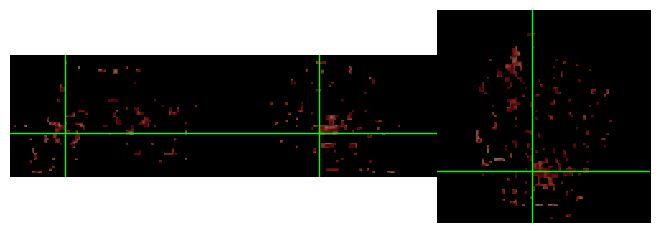

In [119]:
subject='s06'

# Load example func and correlation map
exfunc_img = exfuncs[subjects_rest.index(subjects_rest[1])]
exfunc = exfunc_img.get_fdata()
corr = corrmaps[subjects_rest.index(subjects_rest[1])].get_fdata()

# Get cerebellum coordinates
cerebellum_coordinates = sc.get_cerebellum_coordinates()
exfunc_world_voxels = cerebellum_coordinates[subject]
exfunc_img_voxels = nib.affines.apply_affine(exfunc_img.affine, exfunc_world_voxels)
print(exfunc_world_voxels)
print(exfunc_img_voxels)

fig = plt.figure(figsize=(10, 10))
fig = ortho(exfunc, exfunc_world_voxels, background=background, cursor=True, cmap=plt.cm.gray)
fig = ortho(corr, exfunc_world_voxels, background=background, cursor=False, cmap=red_yellow, alpha=0.5, fig=fig)


(36, 23, 20)
[ 10.17331523 -49.09304976 -25.36902487]


<Figure size 1000x1000 with 0 Axes>

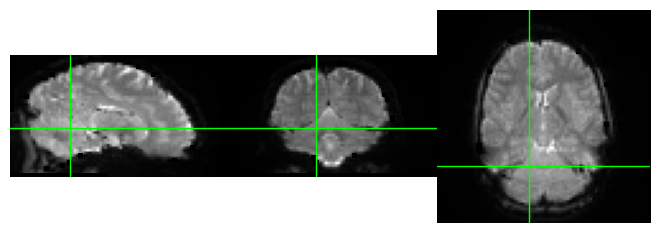

In [108]:
subject='s02'

# Load example func and correlation map
exfunc_img = exfuncs[subjects_rest.index(subjects_rest[1])]
exfunc = exfunc_img.get_fdata()
corr = corrmaps[subjects_rest.index(subjects_rest[1])].get_fdata()

# Get cerebellum coordinates
cerebellum_coordinates = sc.get_cerebellum_coordinates()
exfunc_world_voxels = cerebellum_coordinates[subject]
exfunc_img_voxels = nib.affines.apply_affine(exfunc_img.affine, exfunc_world_voxels)
print(exfunc_world_voxels)
print(exfunc_img_voxels)

fig = plt.figure(figsize=(10, 10))
fig = ortho(exfunc, exfunc_world_voxels, background=background, cursor=True, cmap=plt.cm.gray)


/var/folders/y1/13zjm1t50ms6ds24c69y7vx40000gn/T/ipykernel_91449/1969858043.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  red_yellow = plt.cm.get_cmap('Reds_r', 256)


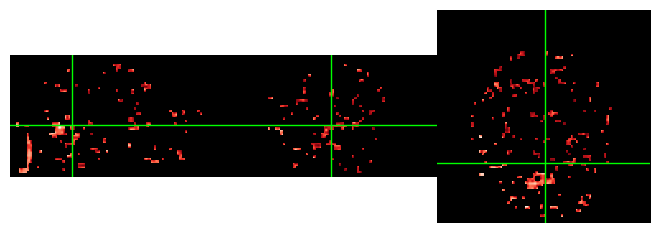

In [17]:
fig = ortho(plot_data, voxel=(42, 24, 21), cursor=True, background=background, cmap=red_yellow)
